**OPIM 5512: Data Science using Python, Fall 2021**

# Crime Analytics Project 

# Introduction

Criminal activity is a worldwide common problem. Over time, Crime incidents are increasing drastically and it is a significant threat to our society. Crime in the United States has been recorded since the early 1600s. Crime rates have varied over time, with a sharp rise after 1900 and reaching a broad bulging peak between the 1970s and early 1990s. After 1994, crime rates began to fall year by year. This trend lasted until 2015, where crime rates began to rise slightly. This reversed in 2018 and 2019, but violent crime increased significantly again in 2020 [1]. 

Society has a strong misconception about crime rates due to media aspects heightening their fear factor. The system's crime data fluctuates by crime depending on certain influencing social factors such as economics, the dark figure of crime, population, and geography [2][3].

Recently, Property crimes outnumbered violent crimes in the U.S. in 2020, numbering 6.45 million and 1.31 million respectively. Larceny was the most common property crime with 4.6 million incidents, while aggravated assaults accounted for around two-thirds of violent crimes [4].
 
The main objective of this project is to **verify the depth of the misconceptions about crime and predict the county-wise number of crimes in the USA as a function of various social factors**. In this project, for performing predictive analysis, the dataset used has County-level crimes reported in the United States of America. It includes categories of crime rate like robbery, Property crime, burglary, motor vehicle theft, etc. We have added external datasets to add more features that are responsible for the crime to predict the county-level crimes in the USA. For prediction, we have created a column consisting of the sum of crimes reported in all the categories that are included in the dataset. We will try different models to predict the crimes and compare these models using various matrices.

We looked at the statistics related to this dataset and found that there is an overall increase of 5.3 percent in the number of violent crimes first 6 months of 2016 when compared with figures reported for the same time in 2015. The violent crime category includes murder, rape (revised definition), rape (legacy definition), robbery, and aggravated assault. The number of property crimes in the United States from January to June of 2016 decreased 0.6 percent when compared with data for the same time period in 2015. Property crimes include burglary, larceny-theft, and motor vehicle theft. Arson is also a property crime, but data for arson are not included in property crime totals due to fluctuations in reporting. Figures for 2016 indicate that arson decreased 1.1 percent when compared with 2015 figures for the same time period [5].



## References

[1] **Criminal Victimization** 2019, Rachel E. Morgan, Ph.D., and Jennifer L. Truman, Ph.D., BJS Statisticians,
 https://bjs.ojp.gov/content/pub/pdf/cv19.pdf

[2] **The measurement and prevalence of violent crime in the United States: persons, places, and times**,  Lurigio, Arthur J and Staton, Monte D, Journal of crime & justice, 2020-05-26

http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC3531351&blobtype=pdf

[3] **Behavior Analysis and Crime Prediction using Big Data and Machine Learning**, International Journal of Recent Technology and Engineering (IJRTE) ISSN: 2277-3878, Volume-8, Issue-1, May 2019

https://www.ijrte.org/wp-content/uploads/papers/v8i1/A3493058119.pdf

[4] **Crime statistics in the U.S.**, Statista Research Department, Sep 30, 2021

https://www.statista.com/topics/2153/crime-in-the-united-states/#dossierKeyfigures

[5] **Preliminary Semiannual Uniform Crime Report**, January–June 2016, James B. Comey, Director, Federal Bureau of Investigation, United States Department of Justice, Washington, D.C. 20535

https://ucr.fbi.gov/crime-in-the-u.s/2016/preliminary-semiannual-uniform-crime-report-januaryjune-2016


# Importing Modules

In [ ]:
## Importing Modules
import pandas as pd

# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

# permutation testing
from sklearn.inspection import permutation_importance

# Partial Dependence Plots
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# External Datasets

In [ ]:
## To run in Akshay's drive
crime  = pd.read_csv('/content/drive/MyDrive/DS using Python/crime2016.csv')
unemployment = pd.read_excel('/content/drive/MyDrive/DS using Python/Unemployment.xlsx')
poverty = pd.read_excel('/content/drive/MyDrive/DS using Python/est16all.xls')
us_county = pd.read_csv('/content/drive/MyDrive/DS using Python/uscities.csv')
other_var = pd.read_csv('/content/drive/MyDrive/DS using Python/us_county_sociohealth_data.csv')

In [ ]:
# ## Mayank's Drive
# crime  = pd.read_csv('/content/drive/MyDrive/OPIM 5512 DS using PYTHON/Project 02/crime2016.csv')
# unemployment = pd.read_excel('/content/drive/MyDrive/OPIM 5512 DS using PYTHON/Project 02/Unemployment.xlsx')
# poverty = pd.read_excel('/content/drive/MyDrive/OPIM 5512 DS using PYTHON/Project 02/est16all.xls')
# us_county = pd.read_csv('/content/drive/MyDrive/OPIM 5512 DS using PYTHON/Project 02/uscities.csv')
# other_var = pd.read_csv('/content/drive/MyDrive/OPIM 5512 DS using PYTHON/Project 02/us_county_sociohealth_data.csv')

In [ ]:
# ## To run in Himesh's drive
# crime  = pd.read_csv('/content/drive/MyDrive/DS using Python/crime2016.csv')
# unemployment = pd.read_excel('/content/drive/MyDrive/DS using Python/Unemployment.xlsx')
# poverty = pd.read_excel('/content/drive/MyDrive/DS using Python/est16all (1).xls')
# us_county = pd.read_csv('/content/drive/MyDrive/DS using Python/uscities.csv')
# other_var = pd.read_csv('/content/drive/MyDrive/DS using Python/us_county_sociohealth_data (1).csv')

## Dataset Description

The crime 2016 dataset itself is rich with almost 10 important features for modeling, but we tried to add more social and economical factors that can improve the prediction. Hence, we came up with 1 dataset each, and below is a brief summary of individual datasets.


1. **Akshay Gandhi**: Unemployment dataset

>https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/

> **Data Description**: The dataset has Unemployment data on the county level in the USA, it has records for different years, and for our purpose, we are taking only the 2016 related data.

>>State: Represents the state names 

>>Area_name: This is the county level aggregation

>>Civilian_labor_force_2016: Number of Labors in a particular county

>>Employed_2016: Number of Employed individuals in 2016 in each county

>>Unemployed_2016: Number of Unemployed individuals in 2016 in each county

>>Unemployment_rate_2016: county-wise unemoloyment rate in year 2016



2. **Himesh Raste**: Poverty dataset

> https://www.census.gov/data/datasets/2016/demo/saipe/2016-state-and-county.html

> **Data Description**: The dataset has Poverty data on the county level in the USA, it has records for 2016 on Median Household income and poverty status in each county.


>>Name: Represents the state names 

>>Postal Code: This is the county level aggregation

>>Poverty Estimate all ages: Number of people below poverty level

>>Poverty Percent all ages: Percentage of people below poverty level

>>Median Household Income: Median household Income County wise


3. **Mayank Patidar**: US Cities dataset

> https://simplemaps.com/data/us-cities

> **Data Description**: The dataset has Names and Correct Abbreviations for states and counties in the USA, this data is critical to join the exact rows with our original crime dataset.

>>city: Represents the city name

>>state_id: This is the State Abbreviation

>> state_name: State name

>>county_name: This is the county level aggregation on County name

4. **Yash Patel**: us_county_sociohealth_data dataset

> https://www.kaggle.com/johnjdavisiv/us-counties-weather-sociohealth-location-data

> **Data Description**: The dataset has the additional features that we want to merge with the original dataset to add more parameters. 

>>state: State name

>>county: This is the county level aggregation on County name

>>total_population: This is the total population for every county

>>percent_excessive_drinking: Percentage of individuals who were found drinking in an excessive amount

>>percent_fair_or_poor_health: Percentage of individuals who suffered from poor health conditions

>>inadequate_facilities: inadequate facilities in each county

>>high_school_graduation_rate: Graduation rate 

>>homicide_rate: Homicide rate in counties

>>percent_limited_access_to_healthy_foods: Percentage of individuals who suffered from limited access to healthy foods

>>overcrowding: overcrowding in county




# Data Cleaning

In [ ]:
# Cleaning of Unemployment Dataset
## keeping the columns that has data columns for year 2016
unemployment_final = unemployment[['State', 'Area_name','Civilian_labor_force_2016','Employed_2016' ,	'Unemployed_2016' ,	'Unemployment_rate_2016']]
unemployment_final

,State,Area_name,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016
0,US,United States,158674951.0,150949349.0,7725602.0,4.868823
1,AL,Alabama,2155729.0,2029157.0,126572.0,5.900000
2,AL,"Autauga County, AL",25710.0,24395.0,1315.0,5.100000
3,AL,"Baldwin County, AL",89778.0,84972.0,4806.0,5.400000
4,AL,"Barbour County, AL",8334.0,7638.0,696.0,8.400000
...,...,...,...,...,...,...
3270,PR,"Vega Baja Municipio, PR",13733.0,11829.0,1904.0,13.900000
3271,PR,"Vieques Municipio, PR",3260.0,2914.0,346.0,10.600000
3272,PR,"Villalba Municipio, PR",7815.0,6235.0,1580.0,20.200000
3273,PR,"Yabucoa Municipio, PR",9081.0,7545.0,1536.0,16.900000


In [ ]:
## Removing State abbreviation from Area Name
unemployment_final['Area_name'] = unemployment_final['Area_name'].str.split(',', expand = True)

In [ ]:
## Removing extra string 'County' from Area name
unemployment_final['Area_name'] = unemployment_final.Area_name.replace(regex = ['County'], value = '').str.strip()

In [ ]:
## Unemployement Final Cleaned Data
unemployment_final

,State,Area_name,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016
0,US,United States,158674951.0,150949349.0,7725602.0,4.868823
1,AL,Alabama,2155729.0,2029157.0,126572.0,5.900000
2,AL,Autauga,25710.0,24395.0,1315.0,5.100000
3,AL,Baldwin,89778.0,84972.0,4806.0,5.400000
4,AL,Barbour,8334.0,7638.0,696.0,8.400000
...,...,...,...,...,...,...
3270,PR,Vega Baja Municipio,13733.0,11829.0,1904.0,13.900000
3271,PR,Vieques Municipio,3260.0,2914.0,346.0,10.600000
3272,PR,Villalba Municipio,7815.0,6235.0,1580.0,20.200000
3273,PR,Yabucoa Municipio,9081.0,7545.0,1536.0,16.900000


In [ ]:
# Cleaning the Poverty datset
poverty['Name'] = poverty.Name.replace(regex = ['County'], value = '').str.strip()

In [ ]:
## Cleaned Poverty dataset
poverty

,Postal Code,Name,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income
0,US,United States,44268996,14,57617
1,AL,Alabama,814197,17.2,46309
2,AL,Autauga,7444,13.5,54487
3,AL,Baldwin,24005,11.7,56460
4,AL,Barbour,6787,29.9,32884
...,...,...,...,...,...
3189,WY,Sweetwater,4264,9.8,74546
3190,WY,Teton,1680,7.3,84118
3191,WY,Uinta,2183,10.6,64713
3192,WY,Washakie,1060,13.1,49533


In [ ]:
## US cities dataset cleaning
## Keeping only the useful columns for merging
us_county = us_county[['city', 'state_id'	, 'state_name' , 'county_name']]

In [ ]:
us_county

,city,state_id,state_name,county_name
0,New York,NY,New York,New York
1,Los Angeles,CA,California,Los Angeles
2,Chicago,IL,Illinois,Cook
3,Miami,FL,Florida,Miami-Dade
4,Dallas,TX,Texas,Dallas
...,...,...,...,...
28333,Gross,NE,Nebraska,Boyd
28334,Lotsee,OK,Oklahoma,Tulsa
28335,The Ranch,MN,Minnesota,Mahnomen
28336,Shamrock,OK,Oklahoma,Creek


In [ ]:
## Cleaning Other Var dataset
## Keeping the features that we felt will be usefull for our modeling purpose
other_var_final = other_var[['state', 'county', 'total_population', 'percent_excessive_drinking', 'inadequate_facilities', 'percent_fair_or_poor_health', 'percent_frequent_mental_distress', 'severe_housing_cost_burden', 'percent_insufficient_sleep', 'overcrowding']]

In [ ]:
## Renaming the column names in Crime Dataset
crime.rename(columns={"Violent\ncrime": "Violent", 'Murder and\nnonnegligent\nmanslaughter' : 'Murder' , 	'Rape\n(revised\ndefinition)1' : 'Rape1' , 	'Rape\n(legacy\ndefinition)2' : 'Rape2' ,	'Aggravated\nassault' : 'Assault' ,	'Property\ncrime'	: 'Property', 	'Larceny-\ntheft' : 'Theft' ,	'Motor\nvehicle\ntheft' : 'Motor_vehicle'}, inplace= True)

In [ ]:
#crime['Violent'] = crime.Violent.replace(regex = [','], value = '').str.strip()
crime['Robbery'] = crime.Robbery.replace(regex = [','], value = '').str.strip()
crime['Assault'] = crime.Assault.replace(regex = [','], value = '').str.strip()
crime['Property'] = crime.Property.replace(regex = [','], value = '').str.strip()
crime['Burglary'] = crime.Burglary.replace(regex = [','], value = '').str.strip()
crime['Theft'] = crime.Theft.replace(regex = [','], value = '').str.strip()
crime['Motor_vehicle'] = crime.Motor_vehicle.replace(regex = [','], value = '').str.strip()

In [ ]:
## Converting the columns as numeric values 
#crime['Violent'] = pd.to_numeric(crime['Violent'])
crime[['Murder', 'Robbery'	, 'Assault'	 , 'Property' ,	'Burglary' ,	'Theft' ,	'Motor_vehicle' ]] = crime[['Murder', 'Robbery'	, 'Assault'	 , 'Property' ,	'Burglary' ,	'Theft' ,	'Motor_vehicle']].apply(pd.to_numeric)

In [ ]:
## Filling all the NA values with '0'
crime[['Violent', 'Murder', 'Robbery'	, 'Assault'	 , 'Property' ,	'Burglary' ,	'Theft' ,	'Motor_vehicle', 'Rape1', 'Rape2', 'Arson3']] = crime[['Violent', 'Murder', 'Robbery'	, 'Assault'	 , 'Property' ,	'Burglary' ,	'Theft' ,	'Motor_vehicle', 'Rape1', 'Rape2', 'Arson3']].fillna(0)

In [ ]:
## Creating the Target Variable for prediction as sum of each crime
crime['total_crimes'] = crime.sum( axis = 1)

In [ ]:
## Final dataset
crime

,State,County,Violent,Murder,Rape1,Rape2,Robbery,Assault,Property,Burglary,Theft,Motor_vehicle,Arson3,total_crimes
0,ALABAMA - Metropolitan Counties,Autauga,73,1,12.0,0.0,8,52.0,429.0,146.0,233.0,50.0,0.0,931.0
1,NaN,Baldwin,127,1,5.0,0.0,23,98.0,613.0,229.0,342.0,42.0,0.0,1353.0
2,NaN,Bibb,0,0,0.0,0.0,0,0.0,37.0,20.0,14.0,3.0,0.0,74.0
3,NaN,Blount,394,1,17.0,0.0,9,367.0,867.0,261.0,501.0,105.0,0.0,2128.0
4,NaN,Calhoun,23,0,7.0,0.0,5,11.0,319.0,137.0,181.0,1.0,0.0,661.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,NaN,Sublette,3,0,0.0,0.0,1,2.0,79.0,5.0,69.0,5.0,0.0,161.0
2608,NaN,Sweetwater,25,0,7.0,0.0,0,18.0,124.0,33.0,69.0,22.0,5.0,278.0
2609,NaN,Uinta,4,0,0.0,0.0,0,4.0,60.0,5.0,50.0,5.0,0.0,124.0
2610,NaN,Washakie,0,0,0.0,0.0,0,0.0,14.0,4.0,7.0,3.0,0.0,28.0


In [ ]:
## Removing raw crime data columns and keeping only State name, County, and Total Crimes
crime_final = crime[['State', 'County','total_crimes']]

In [ ]:
crime_final.ffill(axis = 0, inplace = True)

In [ ]:
crime_final[['State', 'County_cat']] = crime_final['State'].str.split('-', expand = True)

In [ ]:
## adding a state county key value pair for each row
us_county['state_county'] = us_county['state_name'] + '_' + us_county['county_name']

In [ ]:
us_county

,city,state_id,state_name,county_name,state_county
0,New York,NY,New York,New York,New York_New York
1,Los Angeles,CA,California,Los Angeles,California_Los Angeles
2,Chicago,IL,Illinois,Cook,Illinois_Cook
3,Miami,FL,Florida,Miami-Dade,Florida_Miami-Dade
4,Dallas,TX,Texas,Dallas,Texas_Dallas
...,...,...,...,...,...
28333,Gross,NE,Nebraska,Boyd,Nebraska_Boyd
28334,Lotsee,OK,Oklahoma,Tulsa,Oklahoma_Tulsa
28335,The Ranch,MN,Minnesota,Mahnomen,Minnesota_Mahnomen
28336,Shamrock,OK,Oklahoma,Creek,Oklahoma_Creek


In [ ]:
crime_final['State'] = crime_final['State'].str.strip()
crime_final['state_county'] = crime_final['State'] + '_' + crime_final['County']

Converting State and county level data to lower strings

In [ ]:
## Converting data to lower string
crime_final['state_county'] = crime_final['state_county'].str.lower()

In [ ]:
crime_final['state_county'] = crime_final['state_county'].str.strip()

In [ ]:
us_county['state_county'] =  us_county['state_county'].str.lower()

In [ ]:
us_county['state_county'] =  us_county['state_county'].str.strip()

In [ ]:
## Joining the external datasets to the cleaned crime data
crime_final.merge(us_county, on = 'state_county', how = 'inner')

,State,County,total_crimes,County_cat,state_county,city,state_id,state_name,county_name
0,ALABAMA,Autauga,931.0,Metropolitan Counties,alabama_autauga,Prattville,AL,Alabama,Autauga
1,ALABAMA,Autauga,931.0,Metropolitan Counties,alabama_autauga,Pine Level,AL,Alabama,Autauga
2,ALABAMA,Autauga,931.0,Metropolitan Counties,alabama_autauga,Marbury,AL,Alabama,Autauga
3,ALABAMA,Autauga,931.0,Metropolitan Counties,alabama_autauga,Autaugaville,AL,Alabama,Autauga
4,ALABAMA,Autauga,931.0,Metropolitan Counties,alabama_autauga,Billingsley,AL,Alabama,Autauga
...,...,...,...,...,...,...,...,...,...
23010,WYOMING,Washakie,28.0,Nonmetropolitan Counties,wyoming_washakie,Ten Sleep,WY,Wyoming,Washakie
23011,WYOMING,Weston,7.0,Nonmetropolitan Counties,wyoming_weston,Newcastle,WY,Wyoming,Weston
23012,WYOMING,Weston,7.0,Nonmetropolitan Counties,wyoming_weston,Upton,WY,Wyoming,Weston
23013,WYOMING,Weston,7.0,Nonmetropolitan Counties,wyoming_weston,Osage,WY,Wyoming,Weston


In [ ]:
us_county.to_excel('us_county.xlsx')
## downloading the cleaned data

In [ ]:
us_county.drop('city', axis = 1, inplace= True)

In [ ]:
us_county.drop_duplicates(inplace = True)
## Duplicates

In [ ]:
## Merging US county data to Crime dataset
crime_final = crime_final.merge(us_county, on = 'state_county', how = 'inner')

In [ ]:
crime_final

,State,County,total_crimes,County_cat,state_county,state_id,state_name,county_name
0,ALABAMA,Autauga,931.0,Metropolitan Counties,alabama_autauga,AL,Alabama,Autauga
1,ALABAMA,Baldwin,1353.0,Metropolitan Counties,alabama_baldwin,AL,Alabama,Baldwin
2,ALABAMA,Bibb,74.0,Metropolitan Counties,alabama_bibb,AL,Alabama,Bibb
3,ALABAMA,Blount,2128.0,Metropolitan Counties,alabama_blount,AL,Alabama,Blount
4,ALABAMA,Calhoun,661.0,Metropolitan Counties,alabama_calhoun,AL,Alabama,Calhoun
...,...,...,...,...,...,...,...,...
2517,WYOMING,Sublette,161.0,Nonmetropolitan Counties,wyoming_sublette,WY,Wyoming,Sublette
2518,WYOMING,Sweetwater,278.0,Nonmetropolitan Counties,wyoming_sweetwater,WY,Wyoming,Sweetwater
2519,WYOMING,Uinta,124.0,Nonmetropolitan Counties,wyoming_uinta,WY,Wyoming,Uinta
2520,WYOMING,Washakie,28.0,Nonmetropolitan Counties,wyoming_washakie,WY,Wyoming,Washakie


In [ ]:
crime_final['county_sid'] = crime_final['state_id'].str.strip() + '_' + crime_final['county_name']
crime_final['county_sid'] = crime_final['county_sid'].str.lower()

In [ ]:
crime_final

,State,County,total_crimes,County_cat,state_county,state_id,state_name,county_name,county_sid
0,ALABAMA,Autauga,931.0,Metropolitan Counties,alabama_autauga,AL,Alabama,Autauga,al_autauga
1,ALABAMA,Baldwin,1353.0,Metropolitan Counties,alabama_baldwin,AL,Alabama,Baldwin,al_baldwin
2,ALABAMA,Bibb,74.0,Metropolitan Counties,alabama_bibb,AL,Alabama,Bibb,al_bibb
3,ALABAMA,Blount,2128.0,Metropolitan Counties,alabama_blount,AL,Alabama,Blount,al_blount
4,ALABAMA,Calhoun,661.0,Metropolitan Counties,alabama_calhoun,AL,Alabama,Calhoun,al_calhoun
...,...,...,...,...,...,...,...,...,...
2517,WYOMING,Sublette,161.0,Nonmetropolitan Counties,wyoming_sublette,WY,Wyoming,Sublette,wy_sublette
2518,WYOMING,Sweetwater,278.0,Nonmetropolitan Counties,wyoming_sweetwater,WY,Wyoming,Sweetwater,wy_sweetwater
2519,WYOMING,Uinta,124.0,Nonmetropolitan Counties,wyoming_uinta,WY,Wyoming,Uinta,wy_uinta
2520,WYOMING,Washakie,28.0,Nonmetropolitan Counties,wyoming_washakie,WY,Wyoming,Washakie,wy_washakie


In [ ]:
poverty

,Postal Code,Name,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income
0,US,United States,44268996,14,57617
1,AL,Alabama,814197,17.2,46309
2,AL,Autauga,7444,13.5,54487
3,AL,Baldwin,24005,11.7,56460
4,AL,Barbour,6787,29.9,32884
...,...,...,...,...,...
3189,WY,Sweetwater,4264,9.8,74546
3190,WY,Teton,1680,7.3,84118
3191,WY,Uinta,2183,10.6,64713
3192,WY,Washakie,1060,13.1,49533


In [ ]:
poverty['county_sid'] = poverty['Postal Code'].str.strip() + '_' + poverty['Name']
poverty['county_sid'] = poverty['county_sid'].str.lower()

In [ ]:
poverty['county_sid']

0       us_united states
1             al_alabama
2             al_autauga
3             al_baldwin
4             al_barbour
              ...       
3189       wy_sweetwater
3190            wy_teton
3191            wy_uinta
3192         wy_washakie
3193           wy_weston
Name: county_sid, Length: 3194, dtype: object

In [ ]:
## Merging Poverty Dataset to Crime dataset
crime_final = crime_final.merge(poverty, on = 'county_sid', how = 'inner')

In [ ]:
crime_final

,State,County,total_crimes,County_cat,state_county,state_id,state_name,county_name,county_sid,Postal Code,Name,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income
0,ALABAMA,Autauga,931.0,Metropolitan Counties,alabama_autauga,AL,Alabama,Autauga,al_autauga,AL,Autauga,7444,13.5,54487
1,ALABAMA,Baldwin,1353.0,Metropolitan Counties,alabama_baldwin,AL,Alabama,Baldwin,al_baldwin,AL,Baldwin,24005,11.7,56460
2,ALABAMA,Bibb,74.0,Metropolitan Counties,alabama_bibb,AL,Alabama,Bibb,al_bibb,AL,Bibb,4099,20.1,43079
3,ALABAMA,Blount,2128.0,Metropolitan Counties,alabama_blount,AL,Alabama,Blount,al_blount,AL,Blount,8033,14.1,47213
4,ALABAMA,Calhoun,661.0,Metropolitan Counties,alabama_calhoun,AL,Alabama,Calhoun,al_calhoun,AL,Calhoun,19057,17.1,41778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,WYOMING,Sublette,161.0,Nonmetropolitan Counties,wyoming_sublette,WY,Wyoming,Sublette,wy_sublette,WY,Sublette,646,6.7,72198
2468,WYOMING,Sweetwater,278.0,Nonmetropolitan Counties,wyoming_sweetwater,WY,Wyoming,Sweetwater,wy_sweetwater,WY,Sweetwater,4264,9.8,74546
2469,WYOMING,Uinta,124.0,Nonmetropolitan Counties,wyoming_uinta,WY,Wyoming,Uinta,wy_uinta,WY,Uinta,2183,10.6,64713
2470,WYOMING,Washakie,28.0,Nonmetropolitan Counties,wyoming_washakie,WY,Wyoming,Washakie,wy_washakie,WY,Washakie,1060,13.1,49533


In [ ]:
unemployment_final

,State,Area_name,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016
0,US,United States,158674951.0,150949349.0,7725602.0,4.868823
1,AL,Alabama,2155729.0,2029157.0,126572.0,5.900000
2,AL,Autauga,25710.0,24395.0,1315.0,5.100000
3,AL,Baldwin,89778.0,84972.0,4806.0,5.400000
4,AL,Barbour,8334.0,7638.0,696.0,8.400000
...,...,...,...,...,...,...
3270,PR,Vega Baja Municipio,13733.0,11829.0,1904.0,13.900000
3271,PR,Vieques Municipio,3260.0,2914.0,346.0,10.600000
3272,PR,Villalba Municipio,7815.0,6235.0,1580.0,20.200000
3273,PR,Yabucoa Municipio,9081.0,7545.0,1536.0,16.900000


In [ ]:
unemployment_final['county_sid'] = unemployment_final['State'].str.strip() + '_' + unemployment_final['Area_name']
unemployment_final['county_sid'] = unemployment_final['county_sid'].str.lower()

In [ ]:
## Merging unemployement data into Crime data
crime_final = crime_final.merge(unemployment_final, on = 'county_sid', how = 'inner')

In [ ]:
crime_final

,State_x,County,total_crimes,County_cat,state_county,state_id,state_name,county_name,county_sid,Postal Code,Name,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income,State_y,Area_name,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016
0,ALABAMA,Autauga,931.0,Metropolitan Counties,alabama_autauga,AL,Alabama,Autauga,al_autauga,AL,Autauga,7444,13.5,54487,AL,Autauga,25710.0,24395.0,1315.0,5.1
1,ALABAMA,Baldwin,1353.0,Metropolitan Counties,alabama_baldwin,AL,Alabama,Baldwin,al_baldwin,AL,Baldwin,24005,11.7,56460,AL,Baldwin,89778.0,84972.0,4806.0,5.4
2,ALABAMA,Bibb,74.0,Metropolitan Counties,alabama_bibb,AL,Alabama,Bibb,al_bibb,AL,Bibb,4099,20.1,43079,AL,Bibb,8539.0,7986.0,553.0,6.5
3,ALABAMA,Blount,2128.0,Metropolitan Counties,alabama_blount,AL,Alabama,Blount,al_blount,AL,Blount,8033,14.1,47213,AL,Blount,24380.0,23061.0,1319.0,5.4
4,ALABAMA,Calhoun,661.0,Metropolitan Counties,alabama_calhoun,AL,Alabama,Calhoun,al_calhoun,AL,Calhoun,19057,17.1,41778,AL,Calhoun,45450.0,42470.0,2980.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,WYOMING,Sublette,161.0,Nonmetropolitan Counties,wyoming_sublette,WY,Wyoming,Sublette,wy_sublette,WY,Sublette,646,6.7,72198,WY,Sublette,4232.0,3958.0,274.0,6.5
2478,WYOMING,Sweetwater,278.0,Nonmetropolitan Counties,wyoming_sweetwater,WY,Wyoming,Sweetwater,wy_sweetwater,WY,Sweetwater,4264,9.8,74546,WY,Sweetwater,22140.0,20794.0,1346.0,6.1
2479,WYOMING,Uinta,124.0,Nonmetropolitan Counties,wyoming_uinta,WY,Wyoming,Uinta,wy_uinta,WY,Uinta,2183,10.6,64713,WY,Uinta,9426.0,8876.0,550.0,5.8
2480,WYOMING,Washakie,28.0,Nonmetropolitan Counties,wyoming_washakie,WY,Wyoming,Washakie,wy_washakie,WY,Washakie,1060,13.1,49533,WY,Washakie,4214.0,4013.0,201.0,4.8


In [ ]:
other_var_final

,state,county,total_population,percent_excessive_drinking,inadequate_facilities,percent_fair_or_poor_health,percent_frequent_mental_distress,severe_housing_cost_burden,percent_insufficient_sleep,overcrowding
0,Alabama,Autauga,55049,15.026031,1.346154,20.882987,14.129347,12.826718,35.905406,1.201923
1,Alabama,Baldwin,199510,17.958310,0.479042,17.509134,13.475336,12.277388,33.305868,1.270792
2,Alabama,Barbour,26614,12.844016,0.603070,29.591802,16.586252,13.445946,38.563167,1.688596
3,Alabama,Bibb,22572,15.570042,0.709220,19.439724,14.017536,9.978277,38.148865,0.255319
4,Alabama,Blount,57704,14.230594,1.091174,21.745293,14.859271,7.851446,35.945010,1.891368
...,...,...,...,...,...,...,...,...,...,...
3139,Wyoming,Uinta,20893,19.113357,0.390310,15.537464,11.902582,8.008158,31.090485,3.499327
3140,Wyoming,Washakie,8351,16.523261,0.858369,15.955971,11.718519,8.081395,28.472484,2.117310
3141,Wyoming,Weston,7175,17.684551,3.508772,13.934025,11.432102,12.382496,30.225940,1.084530
3142,Missouri,Kansas City,1113072,20.842316,0.652998,16.402077,12.964917,12.711591,35.496103,1.506330


In [ ]:
other_var_final['state_county'] = other_var_final['state'].str.strip() + '_' + other_var_final['county']
other_var_final['state_county'] = other_var_final['state_county'].str.lower()

In [ ]:
## Merging other var data to Crime dataset
crime_final = crime_final.merge(other_var_final, on = 'state_county', how = 'inner')

In [ ]:
crime_final

,State_x,County,total_crimes,County_cat,state_county,state_id,state_name,county_name,county_sid,Postal Code,Name,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income,State_y,Area_name,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,state,county,total_population,percent_excessive_drinking,inadequate_facilities,percent_fair_or_poor_health,percent_frequent_mental_distress,severe_housing_cost_burden,percent_insufficient_sleep,overcrowding
0,ALABAMA,Autauga,931.0,Metropolitan Counties,alabama_autauga,AL,Alabama,Autauga,al_autauga,AL,Autauga,7444,13.5,54487,AL,Autauga,25710.0,24395.0,1315.0,5.1,Alabama,Autauga,55049,15.026031,1.346154,20.882987,14.129347,12.826718,35.905406,1.201923
1,ALABAMA,Baldwin,1353.0,Metropolitan Counties,alabama_baldwin,AL,Alabama,Baldwin,al_baldwin,AL,Baldwin,24005,11.7,56460,AL,Baldwin,89778.0,84972.0,4806.0,5.4,Alabama,Baldwin,199510,17.958310,0.479042,17.509134,13.475336,12.277388,33.305868,1.270792
2,ALABAMA,Bibb,74.0,Metropolitan Counties,alabama_bibb,AL,Alabama,Bibb,al_bibb,AL,Bibb,4099,20.1,43079,AL,Bibb,8539.0,7986.0,553.0,6.5,Alabama,Bibb,22572,15.570042,0.709220,19.439724,14.017536,9.978277,38.148865,0.255319
3,ALABAMA,Blount,2128.0,Metropolitan Counties,alabama_blount,AL,Alabama,Blount,al_blount,AL,Blount,8033,14.1,47213,AL,Blount,24380.0,23061.0,1319.0,5.4,Alabama,Blount,57704,14.230594,1.091174,21.745293,14.859271,7.851446,35.945010,1.891368
4,ALABAMA,Calhoun,661.0,Metropolitan Counties,alabama_calhoun,AL,Alabama,Calhoun,al_calhoun,AL,Calhoun,19057,17.1,41778,AL,Calhoun,45450.0,42470.0,2980.0,6.6,Alabama,Calhoun,115883,13.842230,0.843133,23.107733,15.191507,11.824932,41.314344,1.542046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,WYOMING,Sublette,161.0,Nonmetropolitan Counties,wyoming_sublette,WY,Wyoming,Sublette,wy_sublette,WY,Sublette,646,6.7,72198,WY,Sublette,4232.0,3958.0,274.0,6.5,Wyoming,Sublette,10032,19.337770,0.249610,12.237396,9.893708,3.893250,29.000738,0.780031
2478,WYOMING,Sweetwater,278.0,Nonmetropolitan Counties,wyoming_sweetwater,WY,Wyoming,Sweetwater,wy_sweetwater,WY,Sweetwater,4264,9.8,74546,WY,Sweetwater,22140.0,20794.0,1346.0,6.1,Wyoming,Sweetwater,44812,22.871908,0.786211,14.813082,10.999999,7.003962,31.170904,2.963411
2479,WYOMING,Uinta,124.0,Nonmetropolitan Counties,wyoming_uinta,WY,Wyoming,Uinta,wy_uinta,WY,Uinta,2183,10.6,64713,WY,Uinta,9426.0,8876.0,550.0,5.8,Wyoming,Uinta,20893,19.113357,0.390310,15.537464,11.902582,8.008158,31.090485,3.499327
2480,WYOMING,Washakie,28.0,Nonmetropolitan Counties,wyoming_washakie,WY,Wyoming,Washakie,wy_washakie,WY,Washakie,1060,13.1,49533,WY,Washakie,4214.0,4013.0,201.0,4.8,Wyoming,Washakie,8351,16.523261,0.858369,15.955971,11.718519,8.081395,28.472484,2.117310


In [ ]:
## Dropping the additinal rows that were merged or duplicates from the external datasets
crime_final.drop(['state_county',	'Postal Code',	'state_name',	'county_name',	'county_sid','Name','State_x','State_y','Area_name','county'],axis=1,inplace=True)

In [ ]:
## Converting object values to actual float values
crime_final['Poverty Percent, All Ages'] = crime_final['Poverty Percent, All Ages'].astype(float, errors = 'raise')
crime_final['Poverty Estimate, All Ages'] = crime_final['Poverty Estimate, All Ages'].astype(float, errors = 'raise')
crime_final['Median Household Income'] = crime_final['Median Household Income'].astype(float, errors = 'raise')

In [ ]:
crime_final

,County,total_crimes,County_cat,state_id,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,state,total_population,percent_excessive_drinking,inadequate_facilities,percent_fair_or_poor_health,percent_frequent_mental_distress,severe_housing_cost_burden,percent_insufficient_sleep,overcrowding
0,Autauga,931.0,Metropolitan Counties,AL,7444.0,13.5,54487.0,25710.0,24395.0,1315.0,5.1,Alabama,55049,15.026031,1.346154,20.882987,14.129347,12.826718,35.905406,1.201923
1,Baldwin,1353.0,Metropolitan Counties,AL,24005.0,11.7,56460.0,89778.0,84972.0,4806.0,5.4,Alabama,199510,17.958310,0.479042,17.509134,13.475336,12.277388,33.305868,1.270792
2,Bibb,74.0,Metropolitan Counties,AL,4099.0,20.1,43079.0,8539.0,7986.0,553.0,6.5,Alabama,22572,15.570042,0.709220,19.439724,14.017536,9.978277,38.148865,0.255319
3,Blount,2128.0,Metropolitan Counties,AL,8033.0,14.1,47213.0,24380.0,23061.0,1319.0,5.4,Alabama,57704,14.230594,1.091174,21.745293,14.859271,7.851446,35.945010,1.891368
4,Calhoun,661.0,Metropolitan Counties,AL,19057.0,17.1,41778.0,45450.0,42470.0,2980.0,6.6,Alabama,115883,13.842230,0.843133,23.107733,15.191507,11.824932,41.314344,1.542046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,Sublette,161.0,Nonmetropolitan Counties,WY,646.0,6.7,72198.0,4232.0,3958.0,274.0,6.5,Wyoming,10032,19.337770,0.249610,12.237396,9.893708,3.893250,29.000738,0.780031
2478,Sweetwater,278.0,Nonmetropolitan Counties,WY,4264.0,9.8,74546.0,22140.0,20794.0,1346.0,6.1,Wyoming,44812,22.871908,0.786211,14.813082,10.999999,7.003962,31.170904,2.963411
2479,Uinta,124.0,Nonmetropolitan Counties,WY,2183.0,10.6,64713.0,9426.0,8876.0,550.0,5.8,Wyoming,20893,19.113357,0.390310,15.537464,11.902582,8.008158,31.090485,3.499327
2480,Washakie,28.0,Nonmetropolitan Counties,WY,1060.0,13.1,49533.0,4214.0,4013.0,201.0,4.8,Wyoming,8351,16.523261,0.858369,15.955971,11.718519,8.081395,28.472484,2.117310


In [ ]:
## Renamimg columns in the right format
crime_final = crime_final.rename(columns = {'Poverty Estimate, All Ages': 'Poverty_Estimate', 'Poverty Percent, All Ages': 'Poverty_Percent', 'Median Household Income': 'Median_Household_Income'}, inplace = False)

In [ ]:
crime_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2482 entries, 0 to 2481
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   County                            2482 non-null   object 
 1   total_crimes                      2482 non-null   float64
 2   County_cat                        2482 non-null   object 
 3   state_id                          2482 non-null   object 
 4   Poverty_Estimate                  2482 non-null   float64
 5   Poverty_Percent                   2482 non-null   float64
 6   Median_Household_Income           2482 non-null   float64
 7   Civilian_labor_force_2016         2482 non-null   float64
 8   Employed_2016                     2482 non-null   float64
 9   Unemployed_2016                   2482 non-null   float64
 10  Unemployment_rate_2016            2482 non-null   float64
 11  state                             2482 non-null   object 
 12  total_

In [ ]:
crime_final.to_excel('crime_final.xlsx')
## Downloading cleaned dataset

The data is cleaned, the datatypes are correct, column names are in right format, and has no null values, it is ready for the modeling purpose...

# Exploratory Data Analysis

Let's see some interesting plots and tables to understand the trends and usefull information in the collectively merged dataset. **CRIME_FINAL**

Table 01 and Plot 01: State Level comparision of Crime on the US geographical map in the year 2016

From the plot as well as the table we can see that **FLORIDA** has the highest number of crimes in year 2016

Texas and California had the 2nd and 3rd highest crimes reported in USA 

In [ ]:
## Importing Plot modules

import plotly.express as px
import plotly.figure_factory as ff
# !pip install --upgrade plotly
# !pip install --upgrade geopandas
# !pip install --upgrade pyshp
# !pip install --upgrade shapely

import plotly
# import geopandas
import numpy as np
import pandas as pd


##Table 1: Total Crimes by State Map

In [ ]:
## Table 01
tmp = pd.DataFrame(crime_final.total_crimes.groupby(by=crime_final.state_id).sum())  
tmp.reset_index(inplace=True)
tmp = tmp.sort_values(by=['total_crimes'], ascending= False)
tmp.reset_index(drop=True)
tmp.head(10)

,state_id,total_crimes
5,FL,459570.0
35,TX,258973.0
3,CA,230213.0
32,SC,151761.0
6,GA,126843.0
20,NC,104536.0
34,TN,89552.0
39,WA,88485.0
28,OH,79906.0
15,MI,64183.0


In [ ]:
## PLOT 01
## using choropleth to plot the states in USA
fig = px.choropleth(tmp,
                    locations='state_id',
                    color='total_crimes',
                    color_continuous_scale='spectral_r',    
                    locationmode='USA-states',
                    scope='usa')
## adding names of the states to the plot
fig.add_scattergeo(
    locations=tmp['state_id'],
    locationmode='USA-states',
    text=tmp['state_id'],
    mode='text')

## To allign the name of the states to the centre of each state in map
fig.update_layout(
    title={'text':'TOTAL CRIMES by State',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
fig.show()

##Table 2: State Level comparision of Crime as an aspect of Poverty in the year 2016

The table shows that the top 3 states in terms of total crimes are also the top 3 states in terms of poverty. We can conclude from this data that **poverty** can also be a deciding factor in increase of crime rate

From the scatter plot, we can see the trend, As the number of individuals below poverty increases, total crime also increases

In [ ]:
## Table 02
tmp = pd.DataFrame(crime_final.groupby(by=crime_final.state_id).sum())  
tmp.reset_index(inplace=True)
tmp['rank_poverty'] = tmp["Poverty_Estimate"].rank(ascending=False)
tmp = tmp.sort_values(by=['total_crimes'], ascending= False)
tmp.reset_index(drop=False)
tmp[['state_id','total_crimes','Poverty_Estimate','rank_poverty']].head(10)

,state_id,total_crimes,Poverty_Estimate,rank_poverty
5,FL,459570.0,2852080.0,3.0
35,TX,258973.0,4215151.0,2.0
3,CA,230213.0,5327545.0,1.0
32,SC,151761.0,623267.0,24.0
6,GA,126843.0,1274361.0,8.0
20,NC,104536.0,960690.0,13.0
34,TN,89552.0,923166.0,14.0
39,WA,88485.0,744068.0,19.0
28,OH,79906.0,1155854.0,9.0
15,MI,64183.0,1445327.0,7.0


In [ ]:
## PLOT 02
px.scatter(tmp, x="total_crimes",y="Poverty_Estimate",
           color="state_id",size='total_crimes',
           title='Total Crime vs Poverty Estimate for the year 2016 in US')

##Table 3: State Level comparision of Crime as an aspect of Unemployment in the year 2016

The table shows that the top 3 states in terms of total crimes are also the top 3 states in terms of Unemployment and Poverty(as we have seen in Table 02). We can conclude from this data that Unemployment can also be a deciding factor in increase of crime rate.

Key point to notice here is **South Carolina** being an outlier in terms of total_crimes, there might be a factor responsible for this much hike in crime in this particular state.

From the scatter plot, we can see the trend, As the number of individuals with Unemployment increases, total crime also increases

In [ ]:
## Table 03
tmp = pd.DataFrame(crime_final.groupby(by=crime_final.state_id).sum())  
tmp.reset_index(inplace=True)
tmp['rank_unemployment'] = tmp["Unemployed_2016"].rank(ascending=False)
tmp = tmp.sort_values(by=['total_crimes'], ascending= False)
tmp.reset_index(drop=False)
tmp[['state_id','total_crimes','Unemployed_2016','rank_unemployment']].head(10)


,state_id,total_crimes,Unemployed_2016,rank_unemployment
5,FL,459570.0,457475.0,3.0
35,TX,258973.0,611355.0,2.0
3,CA,230213.0,1005479.0,1.0
32,SC,151761.0,93994.0,25.0
6,GA,126843.0,210794.0,9.0
20,NC,104536.0,157846.0,16.0
34,TN,89552.0,134983.0,18.0
39,WA,88485.0,174986.0,12.0
28,OH,79906.0,216827.0,8.0
15,MI,64183.0,240723.0,6.0


In [ ]:
## PLOT 03
px.scatter(tmp, x="total_crimes",y="Unemployed_2016",
           color="state_id",size='total_crimes',
           title='Total Crime vs Unemployment for the year 2016 in US')

##Table 4: State Level comparision of Crime as a percentage of excessive drinking in the particular state in the year 2016

This graph is a bit different from others, here we can notice that the states with higher percentage of excessive drinkers is not in exact correlation with crimes. If we use this Column for modeling it would be interesting to see how the results are varying because of this particular set of values.

In [ ]:
## Table 04
abc = crime_final
abc['no_ex_drinkers'] = abc['total_population'] * (abc['percent_excessive_drinking']/100)
tmp = pd.DataFrame(abc.groupby(by=abc.state_id).sum())  
tmp.reset_index(inplace=True)
tmp['percent_ex_drinker_statewise'] = tmp['no_ex_drinkers'] * 100 / tmp['total_population']
tmp['rank_%_excessive_Drinking'] = tmp["percent_ex_drinker_statewise"].rank(ascending=False)
tmp = tmp.sort_values(by=['total_crimes'], ascending= False)
tmp.reset_index(drop=False)
tmp[['state_id','total_crimes','percent_ex_drinker_statewise','rank_%_excessive_Drinking']].sort_values('rank_%_excessive_Drinking').head(10)

,state_id,total_crimes,percent_ex_drinker_statewise,rank_%_excessive_Drinking
40,WI,27260.0,25.515323,1.0
21,ND,5546.0,23.164626,2.0
26,NV,10610.0,22.641541,3.0
19,MT,17373.0,22.029075,4.0
16,MN,30228.0,21.935237,5.0
22,NE,9078.0,21.921312,6.0
7,IA,15197.0,21.243362,7.0
38,VT,276.0,21.144800,8.0
9,IL,35762.0,21.141722,9.0
31,PA,51.0,20.264712,10.0


In [ ]:
## PLOT 04
px.scatter(tmp, x="total_crimes",y="percent_ex_drinker_statewise",
           color="state_id",
           title='Total Crime vs Excessive Drinkers for the year 2016 in US')

##Table 5: State Level comparision of Crime vs Labor force in the particular state in the year 2016

This graph is a bit different from others, here we can notice that apart from the top 3 states in terms of total crimes, rest other states are not following the trend.

Key point to notice here if we try to model keeping this parameter the model might be inconsistent in the predictions.

In [ ]:
## Table 05
tmp = pd.DataFrame(crime_final.groupby(by=crime_final.state_id).sum())  
tmp.reset_index(inplace=True)
tmp['rank_%_Labor'] = tmp["Civilian_labor_force_2016"].rank(ascending=False)
tmp = tmp.sort_values(by=['total_crimes'], ascending= False)
tmp.reset_index(drop=False)
tmp[['state_id','total_crimes','Civilian_labor_force_2016','rank_%_Labor']].head(10)


,state_id,total_crimes,Civilian_labor_force_2016,rank_%_Labor
5,FL,459570.0,9365451.0,3.0
35,TX,258973.0,13233915.0,2.0
3,CA,230213.0,18253415.0,1.0
32,SC,151761.0,1921489.0,27.0
6,GA,126843.0,3851687.0,13.0
20,NC,104536.0,3198373.0,16.0
34,TN,89552.0,2758401.0,20.0
39,WA,88485.0,3413890.0,15.0
28,OH,79906.0,4236470.0,10.0
15,MI,64183.0,4832708.0,7.0


In [ ]:
## PLOT 05
px.scatter(tmp, x="total_crimes",y="Civilian_labor_force_2016",
           color="state_id",
           title='Total Crime vs Civilian Labor Force for the year 2016 in US')

EDA is complete as of now and we have important insights that can be supported by the modeling parameter selection.

In [ ]:
# crime_final.rename(columns={"Poverty Percent, All Ages" : "poverty_percent", "Poverty Estimate, All Ages" : "poverty_estimate", "Median Household Income" : "med_hshld_income"}, inplace = True)

In [ ]:
# crime_final[['poverty_estimate', 'poverty_percent', 'med_hshld_income']] = crime_final[['poverty_estimate', 'poverty_percent', 'med_hshld_income']].apply(pd.to_numeric)

# **Modelling & Error Metrics**

In [ ]:
crime_final

,County,total_crimes,County_cat,state_id,Poverty_Estimate,Poverty_Percent,Median_Household_Income,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,state,total_population,percent_excessive_drinking,inadequate_facilities,percent_fair_or_poor_health,percent_frequent_mental_distress,severe_housing_cost_burden,percent_insufficient_sleep,overcrowding
0,Autauga,931.0,Metropolitan Counties,AL,7444.0,13.5,54487.0,25710.0,24395.0,1315.0,5.1,Alabama,55049,15.026031,1.346154,20.882987,14.129347,12.826718,35.905406,1.201923
1,Baldwin,1353.0,Metropolitan Counties,AL,24005.0,11.7,56460.0,89778.0,84972.0,4806.0,5.4,Alabama,199510,17.958310,0.479042,17.509134,13.475336,12.277388,33.305868,1.270792
2,Bibb,74.0,Metropolitan Counties,AL,4099.0,20.1,43079.0,8539.0,7986.0,553.0,6.5,Alabama,22572,15.570042,0.709220,19.439724,14.017536,9.978277,38.148865,0.255319
3,Blount,2128.0,Metropolitan Counties,AL,8033.0,14.1,47213.0,24380.0,23061.0,1319.0,5.4,Alabama,57704,14.230594,1.091174,21.745293,14.859271,7.851446,35.945010,1.891368
4,Calhoun,661.0,Metropolitan Counties,AL,19057.0,17.1,41778.0,45450.0,42470.0,2980.0,6.6,Alabama,115883,13.842230,0.843133,23.107733,15.191507,11.824932,41.314344,1.542046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,Sublette,161.0,Nonmetropolitan Counties,WY,646.0,6.7,72198.0,4232.0,3958.0,274.0,6.5,Wyoming,10032,19.337770,0.249610,12.237396,9.893708,3.893250,29.000738,0.780031
2478,Sweetwater,278.0,Nonmetropolitan Counties,WY,4264.0,9.8,74546.0,22140.0,20794.0,1346.0,6.1,Wyoming,44812,22.871908,0.786211,14.813082,10.999999,7.003962,31.170904,2.963411
2479,Uinta,124.0,Nonmetropolitan Counties,WY,2183.0,10.6,64713.0,9426.0,8876.0,550.0,5.8,Wyoming,20893,19.113357,0.390310,15.537464,11.902582,8.008158,31.090485,3.499327
2480,Washakie,28.0,Nonmetropolitan Counties,WY,1060.0,13.1,49533.0,4214.0,4013.0,201.0,4.8,Wyoming,8351,16.523261,0.858369,15.955971,11.718519,8.081395,28.472484,2.117310


In [ ]:
Y = crime_final['total_crimes']

In [ ]:
Y.shape

(2482,)

In [ ]:
X = crime_final.drop(['County', 'total_crimes', 'County_cat', 'state_id', 'Poverty_Estimate', 'Civilian_labor_force_2016', 'Employed_2016', 'Unemployed_2016', 'state'],axis=1)


 5                      2482 non-null   float64
 6   Median_Household_Income 

In [ ]:
X.shape

(2482, 11)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 3)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1985, 11) (497, 11) (1985,) (497,)


In [ ]:
#convert to numpy array before scaling
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
#MinMax Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# take that coordinate system you just learned on X_train, and APPLY it to X_test
X_test = scaler.transform(X_test)

In [ ]:
# if you wanted to run summary stats on these to check the range,
# you would need to convert to a pandas dataframe.
tmp = pd.DataFrame(X_train)
tmp.describe() # notice how all the max values are 1, all min values are 0.

,0,1,2,3,4,5,6,7,8,9,10
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,0.276613,0.236329,0.145847,0.010203,0.466430,0.082877,0.317214,0.389350,0.381052,0.412115,0.083201
std,0.134530,0.110790,0.081281,0.035058,0.152552,0.066047,0.149728,0.153693,0.140942,0.176671,0.067970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181614,0.162197,0.089686,0.001142,0.351674,0.046844,0.197186,0.274622,0.284759,0.279797,0.043153
50%,0.257848,0.220003,0.134529,0.002548,0.468559,0.068559,0.297095,0.385659,0.365007,0.404287,0.066428
75%,0.345291,0.288554,0.183857,0.006467,0.572886,0.102491,0.416577,0.497235,0.456825,0.544320,0.099869
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# if you wanted to run summary stats on these to check the range,
# you would need to convert to a pandas dataframe.
tmp = pd.DataFrame(X_test)
tmp.describe() 

,0,1,2,3,4,5,6,7,8,9,10
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,0.262296,0.244271,0.140520,0.009103,0.470158,0.082718,0.303434,0.379189,0.382892,0.394015,0.081113
std,0.123507,0.109492,0.080959,0.028520,0.150320,0.062689,0.142917,0.144332,0.143818,0.171566,0.058904
min,0.024664,0.021454,-0.013453,0.000047,0.000000,0.000000,0.026289,0.036258,0.036738,-0.011139,0.000000
25%,0.172646,0.172942,0.089686,0.001125,0.374466,0.045099,0.207385,0.278922,0.289126,0.277617,0.045538
50%,0.248879,0.230551,0.130045,0.002779,0.469745,0.068802,0.275742,0.374203,0.370998,0.396581,0.066368
75%,0.322870,0.290258,0.179372,0.008151,0.566148,0.099727,0.389820,0.462905,0.461470,0.522858,0.099823
max,0.713004,0.809200,0.771300,0.519783,0.982189,0.487122,1.068372,0.827828,0.936055,0.861613,0.467864


## Linear Regression

In [ ]:
# make a variable to store the general model
LR = LinearRegression()
# fit the model - one line of code - LR is now a 'model object'
LR = LR.fit(X_train, y_train) # order matters here! don't reverse it!


In [ ]:
# store the predictions
train_preds = LR.predict(X_train) 
test_preds = LR.predict(X_test)

Error Metrics for Linear Regression

In [ ]:
# this is a regression problem, and there are three metrics to look at.
# 1) R2 value - look at the documentation: actual, predicted
print("This is train R2:", r2_score(y_train, train_preds)) # train
print("This is test R2:", r2_score(y_test, test_preds)) # test

# bigger numbers are better, values will be between 0 and 1

This is train R2: 0.3956219731898266
This is test R2: -0.9523470325555983


In [ ]:
# 2) mae- look at the documentation: actual, predicted
trainMAE = mean_absolute_error(y_train, train_preds)
print("This is trainMAE:", trainMAE) # train
testMAE = mean_absolute_error(y_test, test_preds)
print("This is testMAE:", testMAE) # test

# values between 0 and +Inf
# values closer to 0 are better

This is trainMAE: 881.5998673833976
This is testMAE: 837.5546826222636


In [ ]:
# 3) mse- look at the documentation: actual, predicted
trainMSE = mean_squared_error(y_train, train_preds)
print("This is trainMSE:", trainMSE)
testMSE = mean_squared_error(y_test, test_preds)
print("This is testMSE:", testMSE)

# values between 0 and +Inf
# values closer to 0 are better

This is trainMSE: 9147213.194413818
This is testMSE: 5203632.106662704


In [ ]:
#4) Bias (Mean Error)

def mean_error(y, y_pred):
    # assuming y and y_pred are numpy arrays
    return np.mean(y_pred - y)

In [ ]:
mean_error(y_train, train_preds)

-2.1259725018772731e-13

In [ ]:
mean_error(y_test, test_preds)

123.76815766063979

In [ ]:
# 5) Mean Absolute Percentage Error

from sklearn.metrics import mean_absolute_percentage_error

trainMAPE = mean_absolute_percentage_error(y_train, train_preds) # train dataset
print("This is train MAPE:", trainMAPE)
testMAPE = mean_absolute_percentage_error(y_test, test_preds) # train dataset
print("This is test MAPE:", testMAPE)

This is train MAPE: 1.4658471516631696e+17
This is test MAPE: 2.1318333362188522e+17


Based on the error metrics, we conducted some research and discovered that there are four counties in the United States that have huge overall crime counts that are significantly higher than the rest of the county.



In [ ]:
crime_final.sort_values(by=['total_crimes'], ascending= False).head(10)

,County,total_crimes,County_cat,state_id,Poverty_Estimate,Poverty_Percent,Median_Household_Income,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,state,total_population,percent_excessive_drinking,inadequate_facilities,percent_fair_or_poor_health,percent_frequent_mental_distress,severe_housing_cost_burden,percent_insufficient_sleep,overcrowding
1992,Harris,99602.0,Metropolitan Counties,TX,752261.0,16.6,56415.0,2251316.0,2131125.0,120191.0,5.3,Texas,4434257,20.458970,0.937341,18.852602,11.632157,14.991612,33.924195,5.662778
267,Miami-Dade,78939.0,Metropolitan Counties,FL,487700.0,18.2,45886.0,1305259.0,1233029.0,72230.0,5.5,Florida,2664418,16.343572,0.919608,23.648070,14.166831,26.229459,33.259352,6.069410
270,Orange,56092.0,Metropolitan Counties,FL,209800.0,16.3,51312.0,708817.0,677671.0,31146.0,4.4,Florida,1256055,17.478543,0.570979,19.454185,13.199196,19.324580,36.028245,2.911094
144,Los Angeles,41347.0,Metropolitan Counties,CA,1629450.0,16.3,61308.0,5018920.0,4751209.0,267711.0,5.3,California,10057155,18.862323,1.720069,16.418669,11.065207,24.265811,35.147281,11.773560
258,Hillsborough,29517.0,Metropolitan Counties,FL,203350.0,15.0,54509.0,709538.0,677812.0,31726.0,4.5,Florida,1323059,19.419628,0.670579,19.551459,13.922080,16.234551,33.475621,3.441634
272,Palm Beach,28376.0,Metropolitan Counties,FL,178918.0,12.6,57607.0,711609.0,677839.0,33770.0,4.7,Florida,1398757,15.352516,0.864358,17.401196,13.165161,19.496387,36.876345,3.029431
142,Kern,23564.0,Metropolitan Counties,CA,190993.0,22.4,49812.0,388109.0,347692.0,40417.0,10.4,California,871337,18.291983,1.057808,22.520319,13.265378,17.290171,36.935856,9.097147
153,Sacramento,23149.0,Metropolitan Counties,CA,243760.0,16.3,59728.0,693979.0,656360.0,37619.0,5.4,California,1479300,19.953298,1.029706,15.800891,11.969445,18.634323,35.475316,4.780642
1404,Nassau,22545.0,Metropolitan Counties,NY,82192.0,6.1,105486.0,700139.0,672300.0,27839.0,4.0,New York,1356801,18.439904,0.728029,12.054412,10.260268,19.167410,38.049836,2.523681
1792,Richland,21363.0,Metropolitan Counties,SC,61910.0,16.4,51973.0,199813.0,190406.0,9407.0,4.7,South Carolina,401743,19.244061,0.946854,17.430245,13.188521,15.221819,36.489399,1.595059


From the above we can see that Harris, Miami-Dade, Orange, LA have higher crime counts and thus have a significant effect on the y_train and y_test. These basically acts as outliers which we cannot ignore or remove.

One option is to try a transformation. Log transformations can pull in high numbers. This can make assumptions work better and  can reduce the impact of a single point if the outlier is an independent variable.

Plots

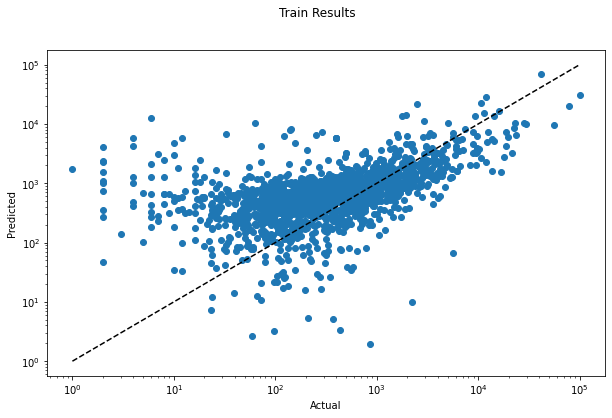

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=y_train, y=train_preds) # Scatter plot

plt.xlim([1E0, 1E5]) # X-axis limit
plt.ylim([1E0, 1E5]) # Y-axis limit

plt.xlabel('Actual')
plt.ylabel('Predicted')


## converting the plot to log scale to better understnd the graph in terms of visibility
plt.xscale('log')
plt.yscale('log')

plt.suptitle('Train Results')
plt.plot([1E0, 1E5], [1E0, 1E5], '--k') # 45 degree line

plt.axis('tight')

plt.show()

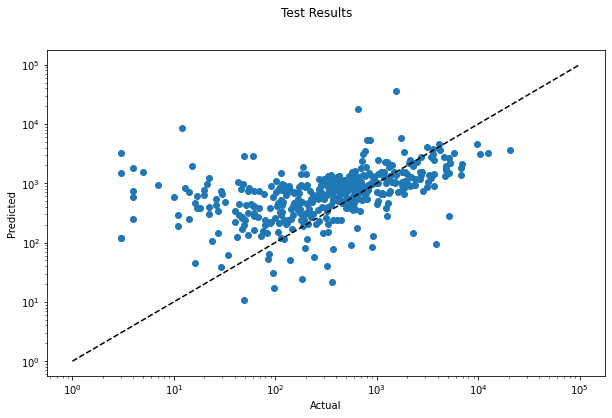

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=y_test, y=test_preds) # Scatter plot

plt.xlim([1E0, 1E5]) # X-axis limit
plt.ylim([1E0, 1E5]) # Y-axis limit

plt.xlabel('Actual')
plt.ylabel('Predicted')


## converting the plot to log scale to better understnd the graph in terms of visibility
plt.xscale('log')
plt.yscale('log')

plt.suptitle('Test Results')
plt.plot([1E0, 1E5], [1E0, 1E5], '--k') # 45 degree line

plt.axis('tight')

plt.show()

## Random Forest Regressor

In [ ]:
#Random Forest Regressor Model

pipe_rf = Pipeline([('scl', StandardScaler()), ('pca', PCA(0.99)),
		              	('clf', RandomForestRegressor(random_state=69))])

In [ ]:
grid_params_rf = [{'clf__min_samples_leaf': [5, 10],
                   'clf__max_depth': [3, 5, 10],
                   'clf__min_samples_split': [5, 10]}]

In [ ]:
gs_rf = GridSearchCV(estimator=pipe_rf,
    param_grid=grid_params_rf,
    scoring='neg_median_absolute_error',
    cv=10)

In [ ]:
# Fitting the grid search objects
print('\nEstimator: Random Forest Regressor' )
best_err = np.inf
best_clf = 0
best_gs = ''
for idx, gs in enumerate([gs_rf]):
	# Fitting grid search	
	gs.fit(X_train, y_train)
	# Printing Best params
	print('Best params: %s' % gs.best_params_)
	# Printing Best training data error
	print('Best training error: %.3f' % gs.best_score_)


Estimator: Random Forest Regressor
Best params: {'clf__max_depth': 10, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 5}
Best training error: -251.774


In [ ]:
# fitting the best model
RFR = RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=5, random_state=69)
RFR.fit(X_train,y_train)

# storing the predictions
train_preds_RFR = RFR.predict(X_train) 
test_preds_RFR = RFR.predict(X_test) 

Plots

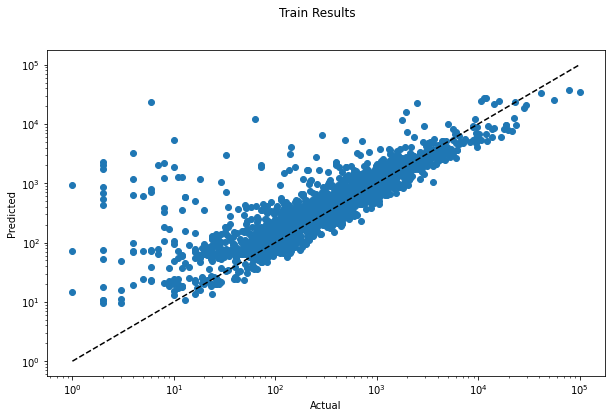

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=y_train, y=train_preds_RFR) # Scatter plot

plt.xlim([1E0, 1E5]) # X-axis limit
plt.ylim([1E0, 1E5]) # Y-axis limit

plt.xlabel('Actual')
plt.ylabel('Predicted')


## converting the plot to log scale to better understnd the graph in terms of visibility
plt.xscale('log')
plt.yscale('log')

plt.suptitle('Train Results')
plt.plot([1E0, 1E5], [1E0, 1E5], '--k') # 45 degree line

plt.axis('tight')

plt.show()

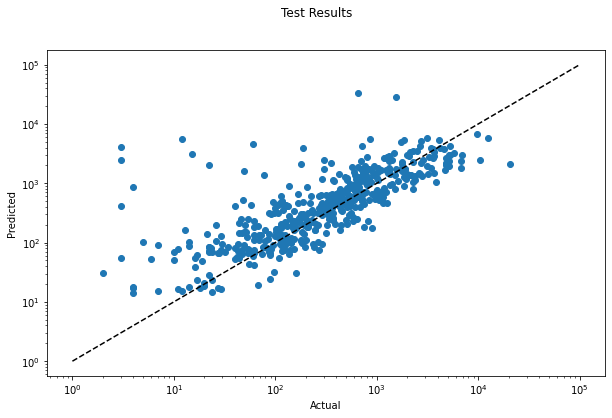

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=y_test, y=test_preds_RFR) # Scatter plot

plt.xlim([1E0, 1E5]) # X-axis limit
plt.ylim([1E0, 1E5]) # Y-axis limit

plt.xlabel('Actual')
plt.ylabel('Predicted')


## converting the plot to log scale to better understnd the graph in terms of visibility
plt.xscale('log')
plt.yscale('log')

plt.suptitle('Test Results')
plt.plot([1E0, 1E5], [1E0, 1E5], '--k') # 45 degree line

plt.axis('tight')

plt.show()

Error Metrics

In [ ]:
print('Mean Absolute Error')
trainMAE_RFR = mean_absolute_error(y_train, train_preds_RFR)
print("Train Error:", trainMAE_RFR) # train
testMAE_RFR = mean_absolute_error(y_test, test_preds_RFR)
print("Test Error:", testMAE_RFR) # test


Mean Absolute Error
Train Error: 512.6637146502254
Test Error: 679.1357927513532


In [ ]:
from sklearn.metrics import median_absolute_error
print('Median Absolute Error')
trainMdAE_RFR = median_absolute_error(y_train, train_preds_RFR)
print("Train Error:", trainMdAE_RFR)
testMdAE_RFR = median_absolute_error(y_test, test_preds_RFR)
print("Test Error:", testMdAE_RFR)

Median Absolute Error
Train Error: 99.45822010147484
Test Error: 159.8849003386856


## autoML

In [ ]:
#AutoML using TPOT
!pip install tpot

     |████████████████████████████████| 87 kB 4.7 MB/s 
     |████████████████████████████████| 173.5 MB 12 kB/s 
     |████████████████████████████████| 160 kB 52.9 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=c2725ac994a796369f6b4ca33cfd7c4658b523cd29a5894f0a721558497d954b
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from tpot import TPOTRegressor
import time
start_time = time.time()
# define search
model = TPOTRegressor(generations=5, verbosity=2, random_state = 3, scoring='neg_mean_absolute_error')
# perform the search
model.fit(X_test, y_test)
end_time = time.time()

# Results
print('TPOT regressor finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test neg(MAE): %.3f' % model.score(X_test, y_test))

# export the best model
model.export('tpot_best_model.py')

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -560.0627147335422

Generation 2 - Current best internal CV score: -554.4713840973841

Generation 3 - Current best internal CV score: -554.4713840973841

Generation 4 - Current best internal CV score: -550.72585988086

Generation 5 - Current best internal CV score: -550.2423775687914

Best pipeline: KNeighborsRegressor(ExtraTreesRegressor(GradientBoostingRegressor(input_matrix, alpha=0.8, learning_rate=0.1, loss=quantile, max_depth=3, max_features=0.7000000000000001, min_samples_leaf=16, min_samples_split=8, n_estimators=100, subsample=0.9500000000000001), bootstrap=False, max_features=1.0, min_samples_leaf=2, min_samples_split=12, n_estimators=100), n_neighbors=29, p=1, weights=uniform)
TPOT regressor finished in 900.9504952430725 seconds
Best pipeline test neg(MAE): -287.923


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator, ZeroCount

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = crime_final
tpot_data.rename(columns={'total_crimes' : 'target'}, inplace=True)
features = tpot_data.drop(['County', 'target', 'County_cat', 'state_id', 'Poverty_Estimate', 'Civilian_labor_force_2016', 
                           'Employed_2016', 'Unemployed_2016', 'state'],axis=1)
# features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=3)

# Average CV score on the training set was: -550.2423775687914
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.8, learning_rate=0.1, loss="quantile", max_depth=3, max_features=0.7000000000000001, min_samples_leaf=16, min_samples_split=8, n_estimators=100, subsample=0.9500000000000001)),
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=1.0, min_samples_leaf=2, min_samples_split=12, n_estimators=100)),
    KNeighborsRegressor(n_neighbors=29, p=1, weights="uniform")
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 3)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

print(mean_absolute_error(testing_target, results))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



589.0061080570825


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



Plots

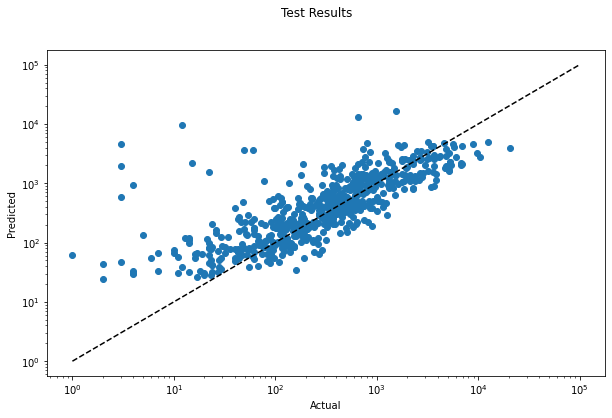

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=testing_target, y=results) # Scatter plot

plt.xlim([1E0, 1E5]) # X-axis limit
plt.ylim([1E0, 1E5]) # Y-axis limit

plt.xlabel('Actual')
plt.ylabel('Predicted')


## converting the plot to log scale to better understnd the graph in terms of visibility
plt.xscale('log')
plt.yscale('log')

plt.suptitle('Test Results')
plt.plot([1E0, 1E5], [1E0, 1E5], '--k') # 45 degree line

plt.axis('tight')

plt.show()

##Best Performing Model

**Mean Absolute Error for the models:**

* Linear Regression - 837.55
* Random Forest Regressor - 679.13
* KNeighbors Regressor -589

MAE is the average over the verification sample of the absolute values of the differences between forecast and the corresponding observation. Lower values are better

<br>

**Residual Plots**

* As we evaluate models based on actual vs predicted plots, the bias in above models show up as patterns in the residuals in all models. 
* The simplest LR model that produces random residuals is a good candidate for being foundation for the comparison with other models.

<br>

*Based on the Mean absolute Error and the actual vs Predicted graph for the Linear Regression, Random Forest Regressor and the best model chosen by AutoML using TPOT - KNeighborsRegressor, it is evident that **KNeighbors Regressor is the best model**.*

## Are certain States easier to predict than other States?


**Assumptions:** High Population, High Unemployment and high povery states would have high crime rates

It is clear from the EDA Tables, Tables 1, 2, and 3, that a large number of crimes occurred in Florida, Texas, and California. Population, unemployment, and poverty were the main causes. As a result, it was easier to predict these states' crime rates.

# Interpretability

## Permutation Feature Importance

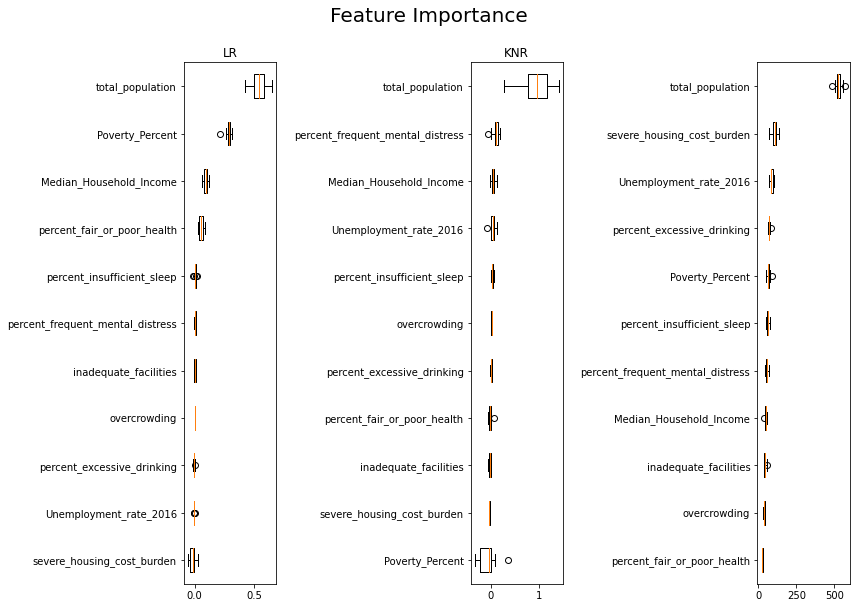

In [ ]:
# plot basics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8)) # 1 row, 3 columns
plt.suptitle('Feature Importance', y= 1.05, size = 20)

# Linear Regression Model
clf = LR # don't forget to update title!
result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=3)
perm_sorted_idx = result.importances_mean.argsort()
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax1.set_title('LR')

# Randon FOrest Regressor
clf = RFR # Assign the Random Forest Regressor object to 'clf' variable
result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=3)
perm_sorted_idx = result.importances_mean.argsort()

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax2.set_title('RFR')

# autoML Model

clf = model # Store the model Object in 'clf' variable

result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=3)
perm_sorted_idx = result.importances_mean.argsort()

ax3.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax3.set_title('KNR')
fig.tight_layout()
plt.show()

### **Trends**
* Total Population is the common variable which is important for crime prediction in particular county.

* All 3 models have different variables which is are most significant for predicting the crimes. For example poverty_percent is most significant in RFR model but it is least significant in LR model.

## Partial Dependence Plots

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# to get rid of annoying future warnings...

In [ ]:
# pcyebox likes the data to be in a DataFrame so let's create one with our imputed data
train_X_df = pd.DataFrame(X_train, columns=X.columns)
train_X_df.head()

,Poverty_Percent,Median_Household_Income,Unemployment_rate_2016,total_population,percent_excessive_drinking,inadequate_facilities,percent_fair_or_poor_health,percent_frequent_mental_distress,severe_housing_cost_burden,percent_insufficient_sleep,overcrowding
0,0.363229,0.158062,0.125561,0.004450,0.522653,0.086234,0.400516,0.495909,0.447493,0.435317,0.067721
1,0.215247,0.284231,0.130045,0.002792,0.458286,0.035094,0.290111,0.337618,0.506423,0.637299,0.050879
2,0.134529,0.307909,0.053812,0.003550,0.539676,0.106742,0.214656,0.217735,0.290824,0.354269,0.075971
3,0.278027,0.274275,0.058296,0.000568,0.331850,0.067959,0.280311,0.353818,0.108405,0.389465,0.020743
4,0.121076,0.430884,0.080717,0.001762,0.500527,0.039400,0.275212,0.371073,0.232285,0.646889,0.065283


In [ ]:
def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=5, 
                  ncols=2, figsize=(12, 12), sharex=False, sharey=True, 
                  subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    # for each feature plot the ice curves and add a rug at the bottom of the 
    # subplot
    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False, 
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()
        
    # get rid of blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

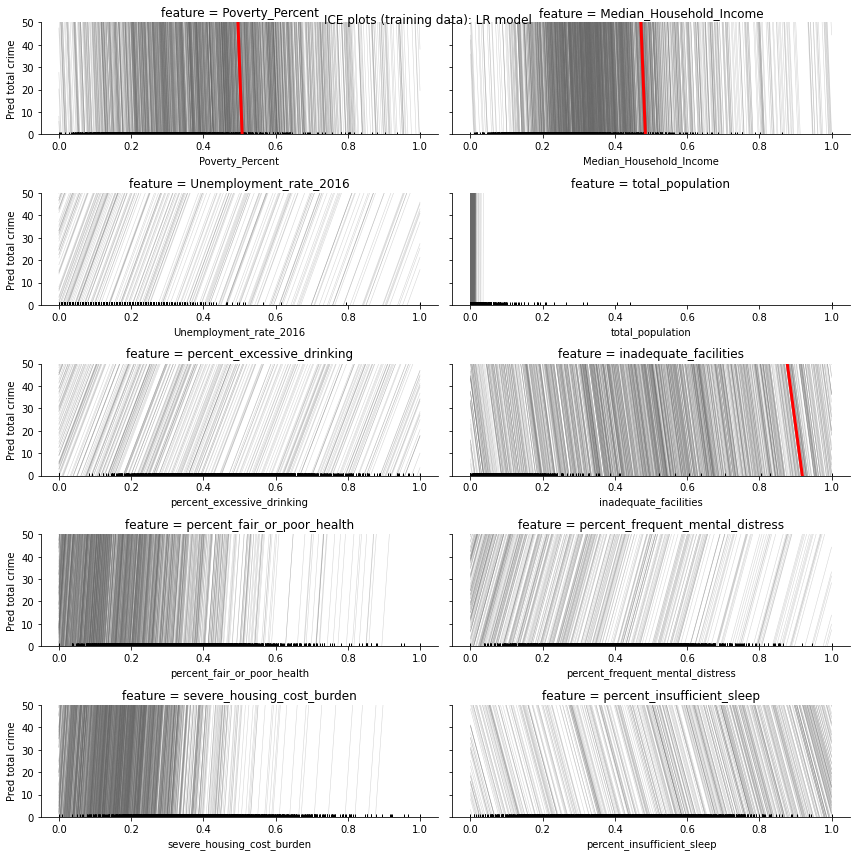

In [ ]:
# Linear Regression PDP

# columns to plot
features = train_X_df.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df, column=feat, predict=LR.predict) # using LR.predict for Linear Regression Plots
                 for feat in features}

plot_ice_grid(train_ice_dfs, train_X_df, features,
                    ax_ylabel='Pred total crime', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,50])
plt.suptitle('ICE plots (training data): LR model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

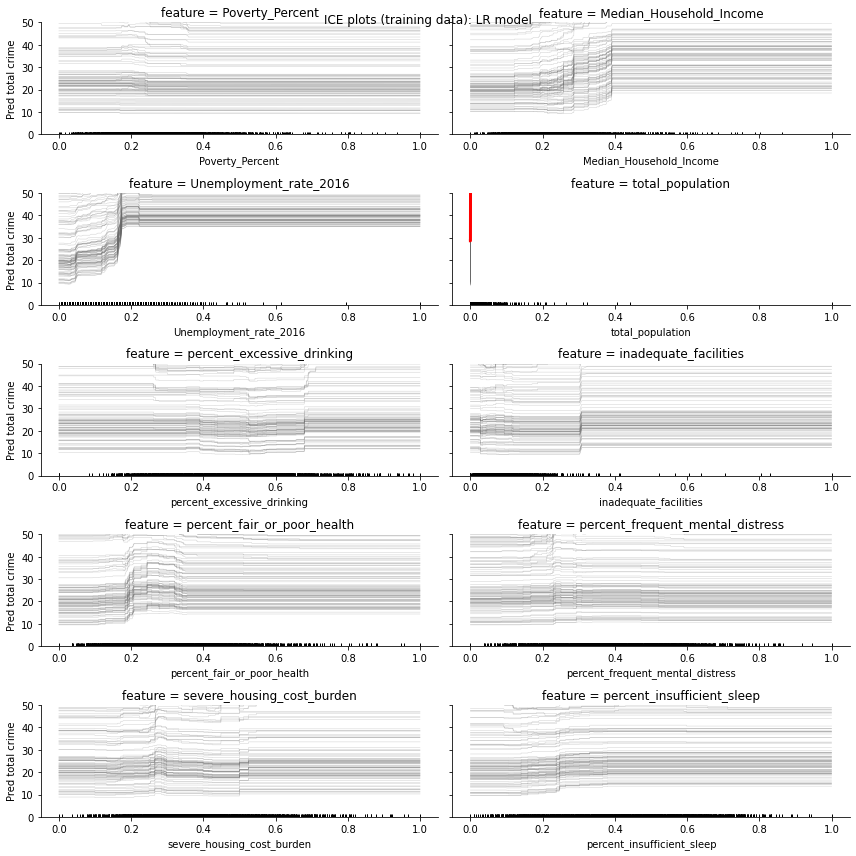

In [ ]:
# Random Forest Regressor PDP

# columns to plot
features = train_X_df.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df, column=feat, predict=RFR.predict) # Using RFR.predict for Random Forest Regressor Plots
                 for feat in features}

plot_ice_grid(train_ice_dfs, train_X_df, features,
                    ax_ylabel='Pred total crime', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,50])
plt.suptitle('ICE plots (training data): LR model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

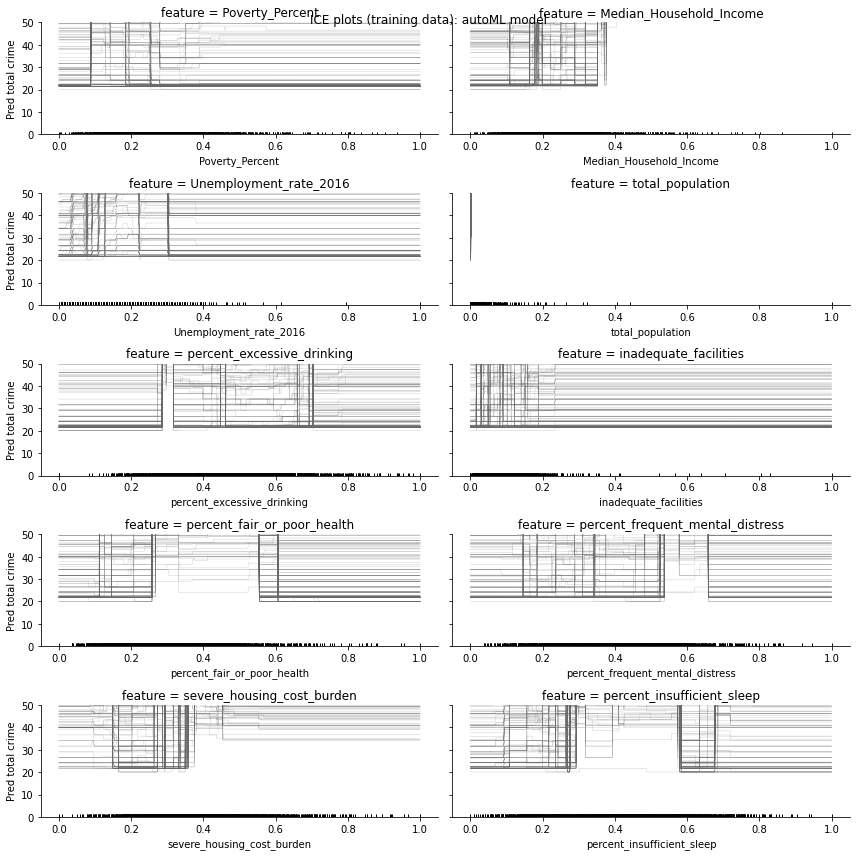

In [ ]:
# autoML PDP

# columns to plot
features = train_X_df.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df, column=feat, predict=model.predict) # Using model.predict for autoML plots
                 for feat in features}

plot_ice_grid(train_ice_dfs, train_X_df, features,
                    ax_ylabel='Pred total crime', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,50])
plt.suptitle('ICE plots (training data): autoML model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

### **Trends**

From the partial dependence plots, it is difficult to observe any trend as all variable acts in different manner in each plot.

## **Observations**

* Total Population is directly proportional to total number of crimes. If we could take the percent crime as target variable and predict the values in terms of population, the results might be unbiased.

* As mentioned in the above point, total population is a key factor for modeling. This can be verified from the fact that California has the highest number of population and all the key indicators such as, unemployment, poverty, excessive drinking etc, are also having the highest impact in California. This can be a reason of having excessive crime in this particular state. Same goes for Texas too.

* Housing Cost burden is one of the influential parameter to have a look at when it comes to crime rate in particular state. As per Feature importance, it is second most significant parameters which drives the crime rate for the best model.

* Florida is the state which is having the highest number of crimes. However, the number of high crimes is mainly beacause of the 2 counties i.e. Miami-Dade and Orange which is having approx 150k and the sum of rest counties is not even close to the number of aforesaid 2 counties. This is one of the reason which might be hampering the accuracy of the model.

* For the 2 best models Random Forest Regressor and KNeighbors Regressor Unemployment is the variable which is common and driving the number of crimes in particular counties.

* From the Feature importance, we observed that inadequate facilities is least significant for both of our best models in predicting number of crimes.

## Conclusion

* From the crime analysis for the counties, we observed that in particular state, the number of crimes are not distributed evenly as per the counties. There are 2-3 counties in each state which drives the number of crimes. 

* As a business stakeholder I would target those counties which are having highest number of crimes and provide better security to get the number of crimes decreased to much greater extent in that state. This would give better resource allocation strategy.

* In the aspect of future project, we would dive deep into the crime dataset for multiple years and see the trend over the period of time. This might provide a better clarity in what else can be a good parameter for modeling. Also, we would like to understand how predictions get affected if we have a time series data of crime.

* There are other crimes such as Police Killings, Domestic Violence which were not included in the dataset and comes into the darker area of the topic and would be interesting to analyse the crimes regarding that and what impact it creates in the county or overall state.

* Rather than anticipating the total number of crimes, predicting the type of crime would have been more useful since we would be able to learn more about the sensitive crimes that are occurring in the counties.



